In [8]:
"""
Script para el análisis exploratorio de datos de calidad del aire.

Este script carga, procesa y visualiza datos de múltiples archivos CSV,
cada uno correspondiente a un contaminante o variable meteorológica.
"""
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [9]:
# 2. CONFIGURACIÓN DE RUTAS Y PARÁMETROS
# Ruta base donde se encuentran los datos y se guardará el análisis.
# Usar Path permite que el código sea más portable entre sistemas operativos.
BASE_PATH = Path(r"B:\Documentos\Universidad\Universidad 2025\Primavera\Machine Learning\segundo intento modelo ML")
DATOS_PATH = BASE_PATH
OUTPUT_PATH = BASE_PATH / "Graficos_Analisis"

# Crear el directorio de salida si no existe.
os.makedirs(OUTPUT_PATH, exist_ok=True)

In [10]:
# 3. LISTA DE ARCHIVOS A PROCESAR
# Nombres de los archivos CSV que contienen los datos de entrada.
ARCHIVOS_CSV = [
    "datos_200101_250901cohrs.csv",
    "datos_200101_250901Humedahrs.csv",
    "datos_200101_250901no2hrs.csv",
    "datos_200101_250901nohrs.csv",
    "datos_200101_250901noxhrs.csv",
    "datos_200101_250901o3hrs.csv",
    "datos_200101_250901pm10hrs.csv",
    "datos_200101_250901pm25hrs.csv",
    "datos_200101_250901so2hrs.csv",
    "datos_200101_250901temperaturahrs.csv",
    "datos_200101_250901direccionvientohrs.csv",
    "datos_200101_250901velocidadviento.csv"
]

In [11]:
def parse_custom_date(row):
    """
    Convierte las columnas de fecha (YYMMDD) y hora (HHMM) en un objeto datetime.

    Args:
        row (pd.Series): Una fila de un DataFrame que contiene la fecha y la hora
                         en sus dos primeras columnas.

    Returns:
        pd.Timestamp: El objeto de fecha y hora combinado. Retorna pd.NaT si
                      la conversión falla.
    """
    try:
        # Asegura que los datos sean strings con el formato correcto.
        date_str = str(int(row.iloc[0])).zfill(6)  # Formato YYMMDD
        time_str = str(int(row.iloc[1])).zfill(4)  # Formato HHMM

        # El formato '2400' no es válido para datetime, se convierte a '0000'
        # del día siguiente. Aquí se simplifica a '0000' para la validación.
        if time_str == '2400':
            time_str = '0000'

        # Combina y convierte a datetime.
        full_datetime_str = f"20{date_str} {time_str}"
        return pd.to_datetime(full_datetime_str, format='%Y%m%d %H%M', errors='coerce')
    except (ValueError, TypeError):
        # Captura errores si la conversión a int o el formato fallan.
        return pd.NaT

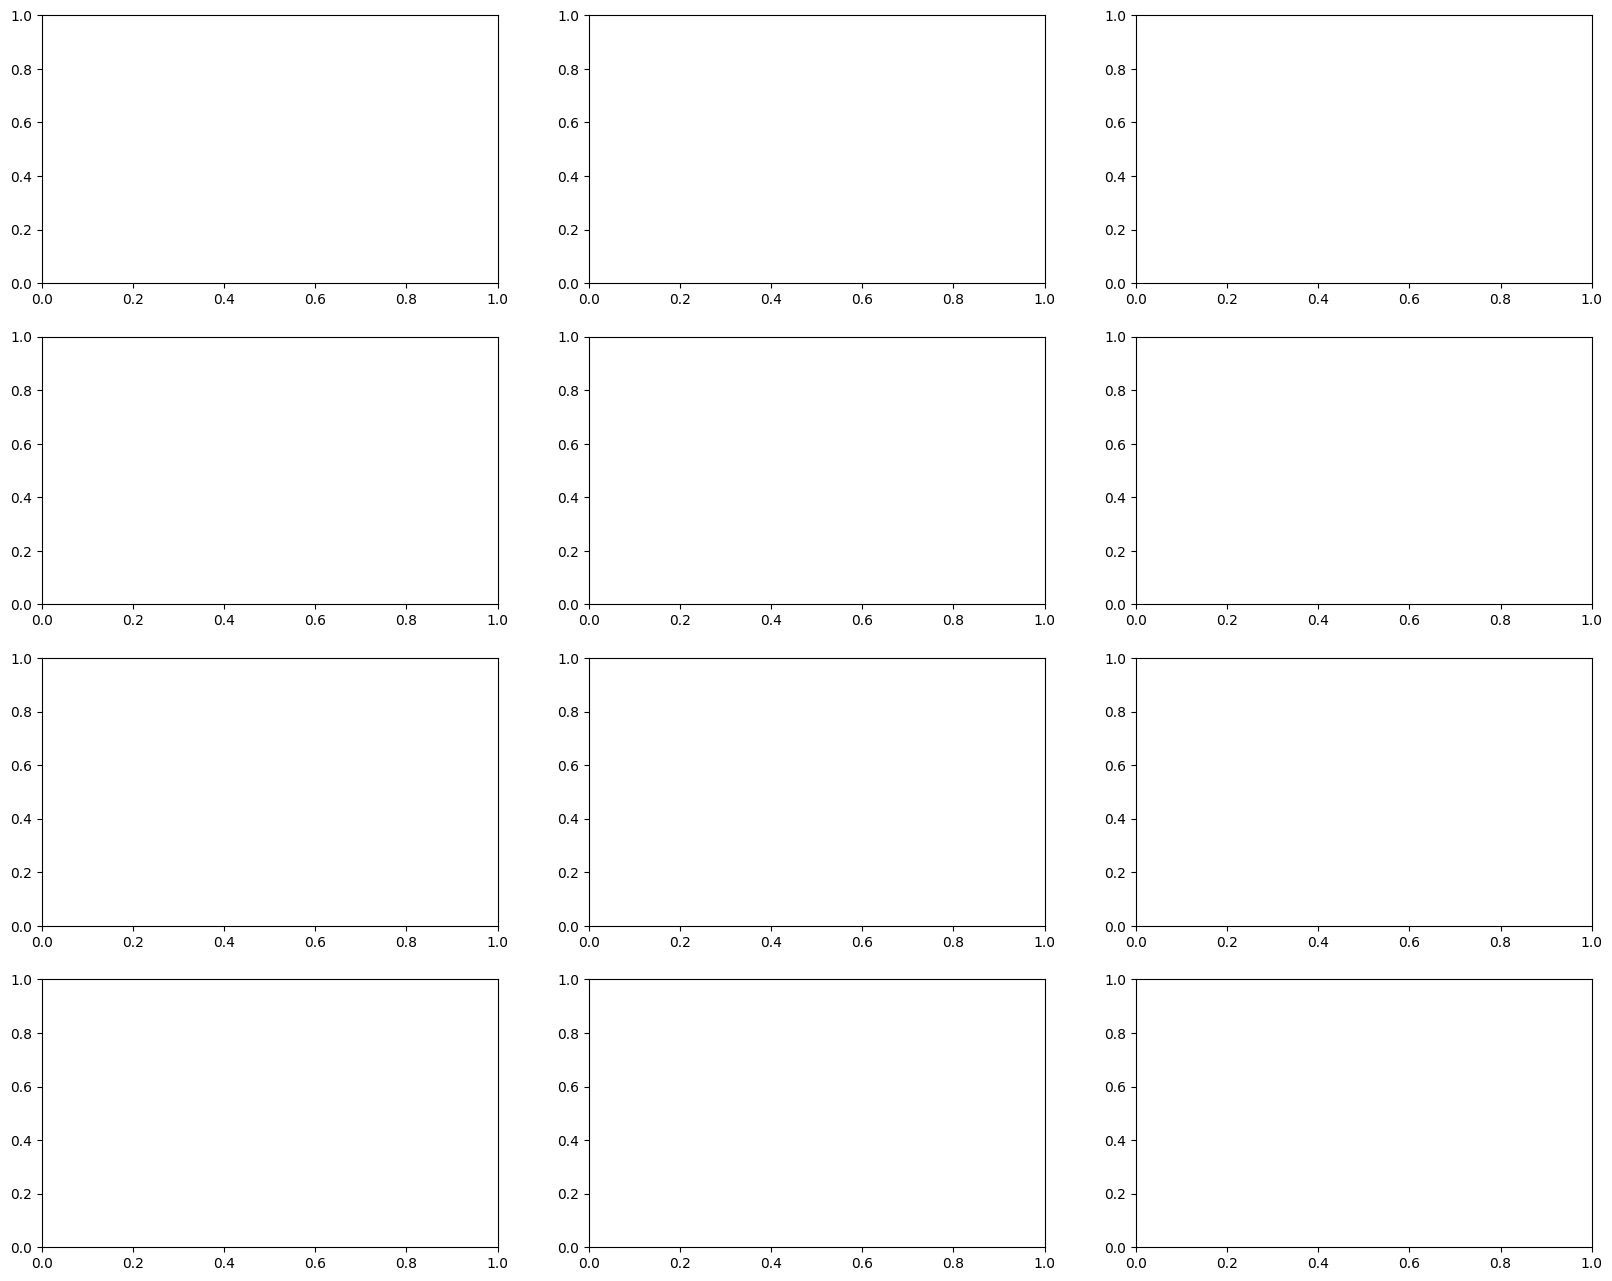

In [12]:
# 5. PREPARACIÓN DEL ENTORNO DE VISUALIZACIÓN
# Crear una figura y una matriz de subplots para visualizar cada archivo.
# Se generará una cuadrícula de 4 filas y 3 columnas.
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
# Aplanar el array de ejes para iterar sobre él fácilmente con un solo índice.
axes = axes.flatten()